# Задача:

1. Загрузить набор данных, telecom churn для задачи классификации.

2. Разделить данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.

3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.

4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).

5. Провести подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.

6. Обучить модель с использованием оптимальных гиперпараметров на обучающей выборке и оцените ее производительность на тестовой выборке.

7. Проведите анализ результатов и сделайте выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

#Решаем задачу предсказания переходов клиентов к другому оператору

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


In [4]:
df=pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
df.isna().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [7]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


*Проводим первичную обработку данных*

In [8]:
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])
df['International plan']=le.fit_transform(df['International plan'])
df['Voice mail plan']=le.fit_transform(df['Voice mail plan'])
df['State']=le.fit_transform(df['State'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   int64  
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [9]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


*В датасете остались только числовые значения*

In [10]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
State,3333.000000,26.059406,14.824911,0.000000,14.000000,26.000000,39.000000,50.000000
Account length,3333.000000,101.064806,39.822106,1.000000,74.000000,101.000000,127.000000,243.000000
Area code,3333.000000,437.182418,42.371290,408.000000,408.000000,415.000000,510.000000,510.000000
International plan,3333.000000,0.096910,0.295879,0.000000,0.000000,0.000000,0.000000,1.000000
Voice mail plan,3333.000000,0.276628,0.447398,0.000000,0.000000,0.000000,1.000000,1.000000
Number vmail messages,3333.000000,8.099010,13.688365,0.000000,0.000000,0.000000,20.000000,51.000000
Total day minutes,3333.000000,179.775098,54.467389,0.000000,143.700000,179.400000,216.400000,350.800000
Total day calls,3333.000000,100.435644,20.069084,0.000000,87.000000,101.000000,114.000000,165.000000
Total day charge,3333.000000,30.562307,9.259435,0.000000,24.430000,30.500000,36.790000,59.640000
Total eve minutes,3333.000000,200.980348,50.713844,0.000000,166.600000,201.400000,235.300000,363.700000


In [11]:
print(df.duplicated().sum())

0


*Дубликатов, пропущенных значений - нет*

*Создаем матрицу объект-признак X и вектор с целевой переменной (Churn) y.*

In [12]:
X=df.drop('Churn', axis=1)
y=df['Churn']

*Проверяем баланс классов*

In [13]:
df['Churn'].value_counts()

,count
Churn,
0,2850
1,483


*По целевому показателю выборка не сбалансированная - данных с меньшим классом (положительное значение Churn) в 5,9 раз меньше, чем с отрицательным значением Churn*

Text(0.5, 1.0, 'Гистограмма распределения целевой переменной (Churn)')

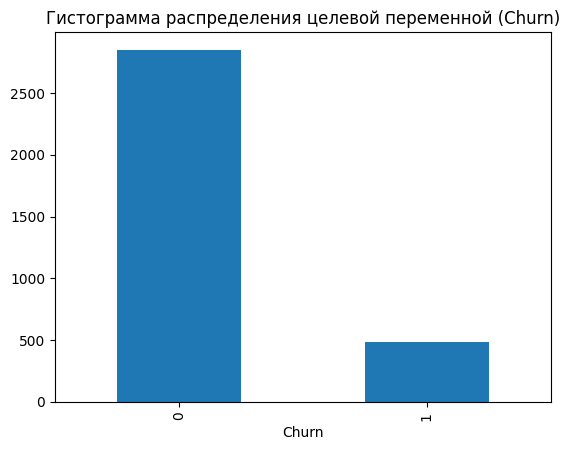

In [14]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Гистограмма распределения целевой переменной (Churn)')

*Разбиваем данные на тренировочную и тестовую части, размер тестовой части — 30%, стратифицированное разбиение в связи с дисбалансом классов*

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


# Строим модель классификаци - RandomForestClassifier, с параметрами "из коробки"

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.94      0.72      0.82       145

    accuracy                           0.95      1000
   macro avg       0.95      0.86      0.90      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy:  0.953
Precision:  0.9375
Recall:  0.7241379310344828
F1-score:  0.8171206225680934
ROC AUC:  0.8579753982657793


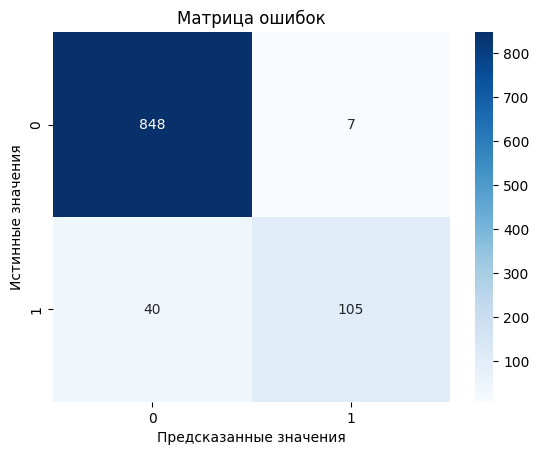

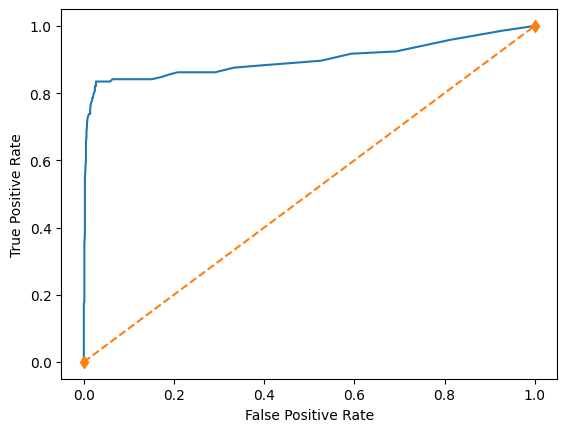

AUC: 0.900


In [16]:
def calculate_model(model=RandomForestClassifier(), X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='binary'))
    print('Recall: ', recall_score(y_test, y_pred, average='binary'))
    print('F1-score: ', f1_score(y_test, y_pred, average='binary'))
    print('ROC AUC: ', roc_auc_score(y_test, y_pred))
    #Строим матрицу ошибок
    confusion_mat=confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.title('Матрица ошибок')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.show();
    #Предсказываем вероятности
    y_pred_proba=model.predict_proba(X_test)[:,1]
    # Строим кривую ROC
    fpr, tpr, thresholds1=roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='RandomForestClassifier')
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show();
    print("AUC: %.3f" % roc_auc_score(y_test, y_pred_proba))
    return model

model1=calculate_model()

Хорошие метрики. Значения метрик близки к 0.8. Модель справилась хорошо.

*Показатель AUC (Area under Curve) - площади под кривой ROC - интерпретирует вероятность, с которой модель верно определит две точки (объекта), расположенные в разных классах, которые поданы ей на вход для анализа. В нашем случае это вероятность 89,6%. Показатель 50% (площадь под синей пунктирной кривой - вариант случайного выбора, рандомного угадывания).*

*Визуализируем важность признаков для предсказания целевого признака Churn:*

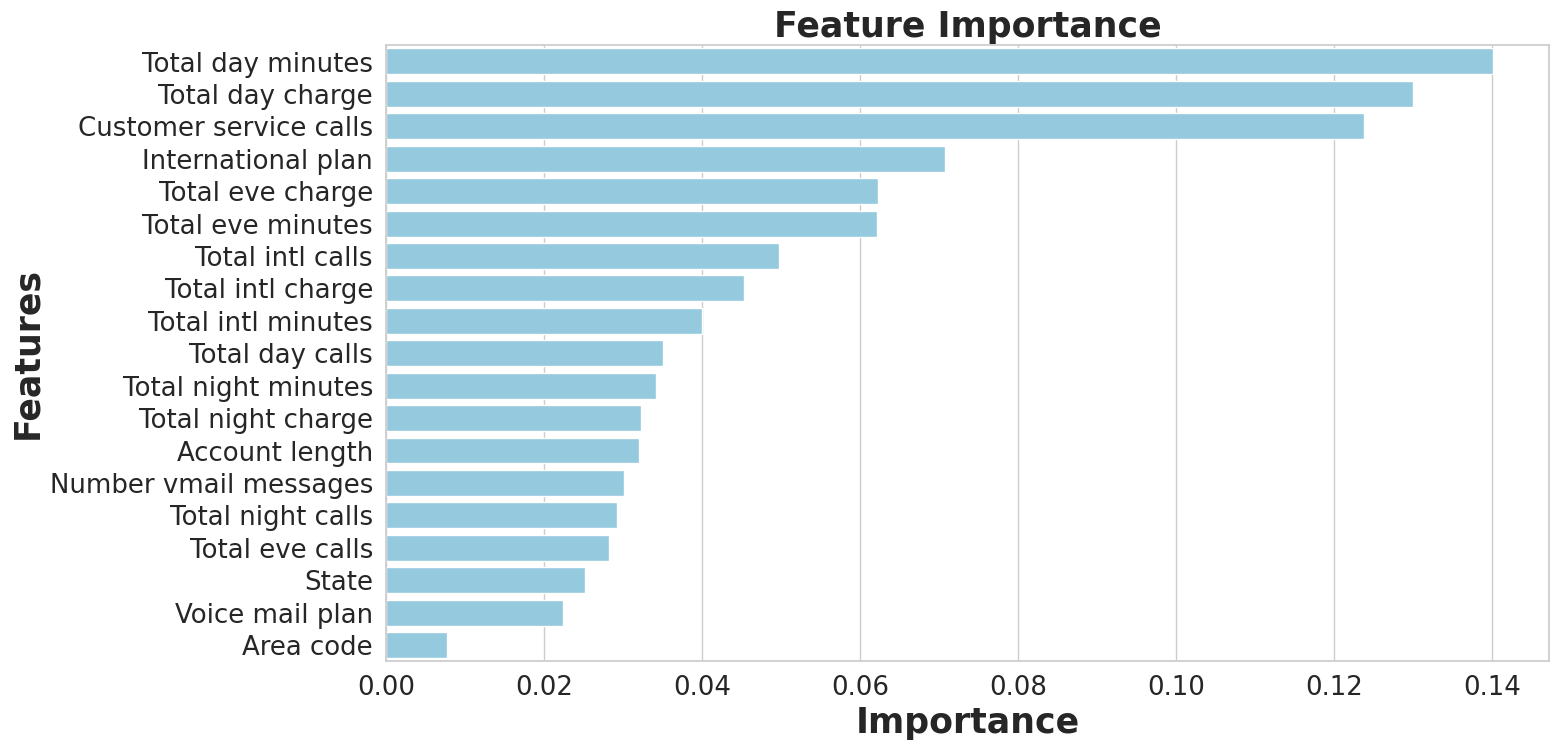

,Features,Gini-Importance
0,Total day minutes,0.140110
1,Total day charge,0.129998
2,Customer service calls,0.123695
3,International plan,0.070700
4,Total eve charge,0.062267
5,Total eve minutes,0.062169
6,Total intl calls,0.049694
7,Total intl charge,0.045256
8,Total intl minutes,0.039913
9,Total day calls,0.035004


In [17]:

feats={}
for feature, importance in zip(df.columns, model1.feature_importances_):
      feats[feature]=importance
importances=(pd.DataFrame.from_dict(feats, orient='index')
                                  .rename(columns={0:'Gini-Importance'})
                                  .sort_values(by='Gini-Importance', ascending=False)
                                  .reset_index().rename(columns={'index': 'Features'}))

plt.figure(figsize=(15, 8))
sns.set(font_scale=5)
sns.set(style='whitegrid', color_codes=True, font_scale=1.7)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title('Feature Importance', fontsize=25, weight='bold')
plt.show();
display(importances)

*Часть признаков не оказывают существенного влияния на целевой параметр*


*Строим матрицу корреляций*

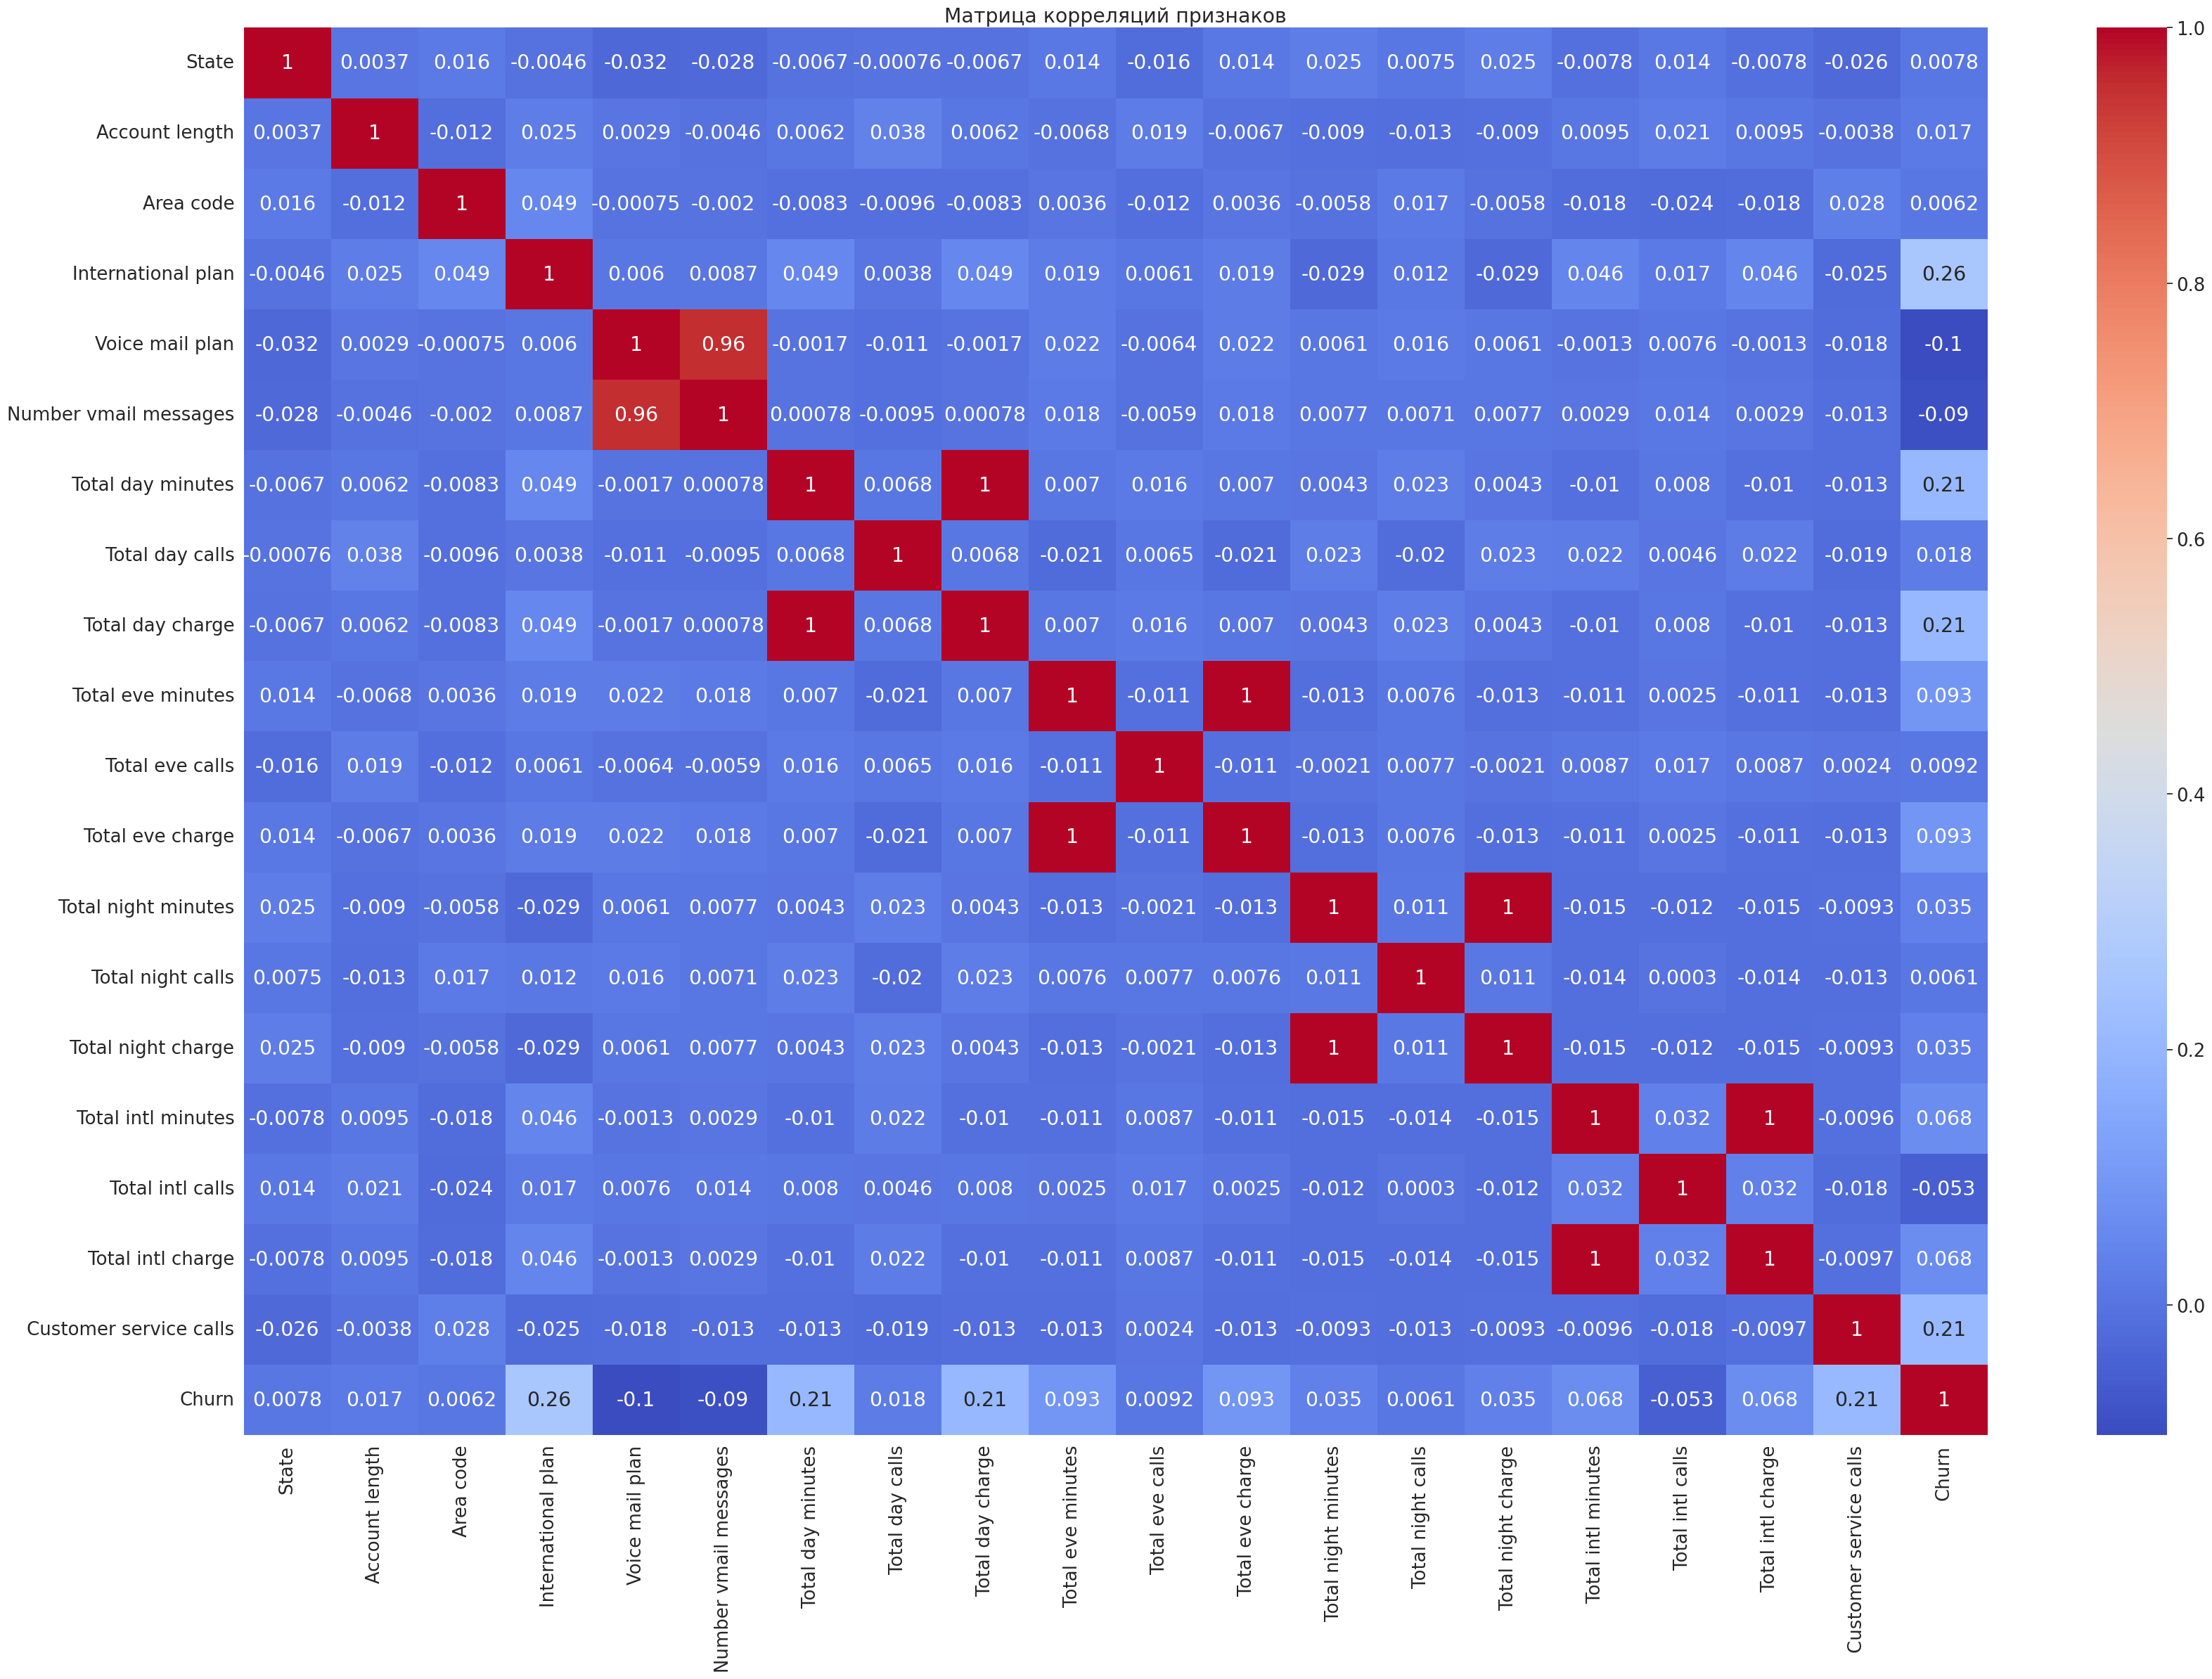

In [18]:
correlation_matrix=df.corr()
plt.figure(figsize=(40, 26))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций признаков')
plt.show();

Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).

In [19]:
# Функция для оценки модели с помощью перекрестной проверки
def evaluate_model(model, X_t, y_t, cv=5):
    scores = cross_val_score(model1, X_t, y_t, scoring='roc_auc', cv=cv)
    return scores.mean()

print('Roc Auc for train data:', evaluate_model(model1, X_train, y_train))
print('Roc Auc for test data:', evaluate_model(model1, X_test, y_test))

Roc Auc for train data: 0.9136777413243381
Roc Auc for test data: 0.8979431336963097


Модель показала себя великолепно на тренеровачных и тестовых данных. Метрики F1 близки к единицы.

*Видим, что некоторые признаки абсолютно коррелируют друг с другом*

*Нами была использована модель RandomForestClassifier с гиперпараметрами "по умолчанию". Применим алгоритм GridSearchCV для нахождения оптимальных гиперпараметров в построении нашей модели. В качестве критерия выберем максимизацию показателя AUC (ROC)*

In [20]:

# Поиск гиперпараметров с помощью сетки параметров
param_grid={
    'n_estimators': [70, 320],
    'max_depth': [2, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 5]
}

grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print(f"Best score: {grid_search.best_score_:.2f}")

Best parameters: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 70}
Best score: 0.92


*Применим найденные гиперпараметры в построении модели, применим сбалансированные по классам веса*

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       855
           1       0.80      0.74      0.77       145

    accuracy                           0.94      1000
   macro avg       0.88      0.86      0.87      1000
weighted avg       0.93      0.94      0.94      1000

Accuracy:  0.936
Precision:  0.8
Recall:  0.7448275862068966
F1-score:  0.7714285714285715
ROC AUC:  0.8566243194192378


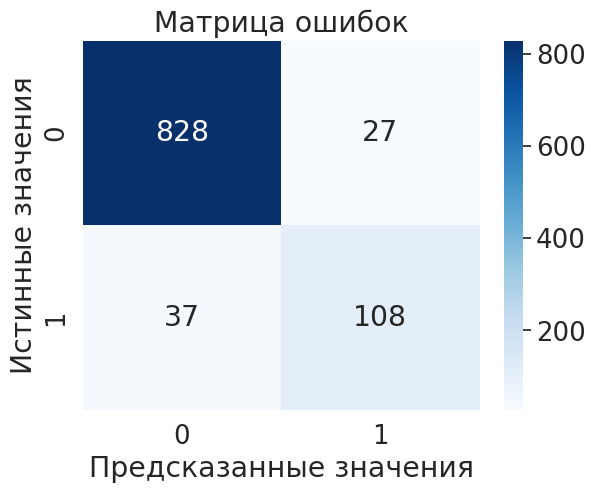

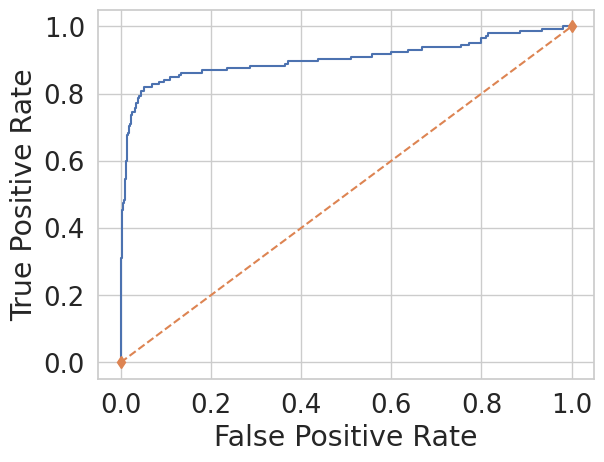

AUC: 0.903


In [21]:
model2=calculate_model(RandomForestClassifier(**best_params, class_weight='balanced'))

*Поиск гиперпараметров с помощью GridSearchCV не привел к существенному улучшению метрик качества модели*

In [22]:
print("Среднее значение roc_auc по 5-кратной кросс-валидации:", evaluate_model(model2, X, y, 5))
print("Среднее значение roc_auc по 10-кратной кросс-валидации:", evaluate_model(model2, X, y, 10))

Среднее значение roc_auc по 5-кратной кросс-валидации: 0.9157341969614758
Среднее значение roc_auc по 10-кратной кросс-валидации: 0.9098528314834706


*При использовании кросс-валидации видим, что значение метрики (площадь под кривой ROC) не снижается, и немного растет, что свидетельствует о стабильности построенной нами модели и отсуствии переобучения при первичном построении.*

**Применим Recursive Feature Elimination (RFE) для выбора количества признаков**

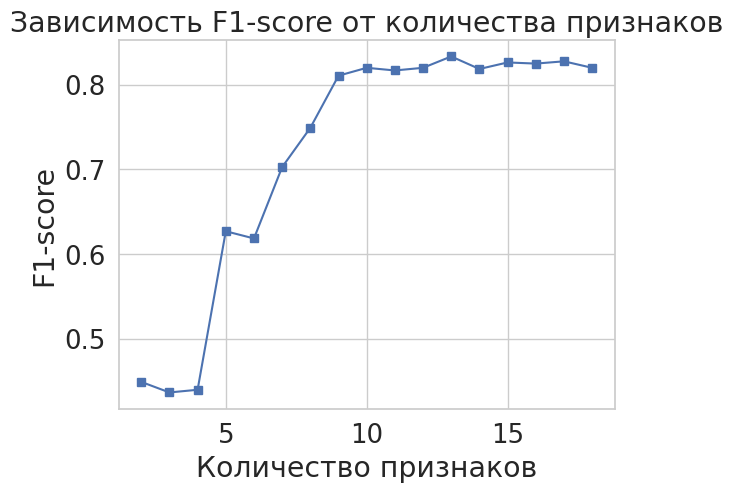

In [23]:
n_features=list(range(2, len(df.columns)-1))
metrics=[]
model3=RandomForestClassifier(random_state=42)
for k in n_features:
  rfe=RFE(model3, n_features_to_select=k)
  rfe.fit(X_train, y_train)
  X_train_rfe=rfe.transform(X_train)
  X_test_rfe=rfe.transform(X_test)
  model3.fit(X_train_rfe, y_train)
  y_pred=model3.predict(X_test_rfe)
  metrics.append(f1_score(y_test, y_pred, average='binary'))


plt.plot(n_features, metrics, marker='s')
plt.xlabel('Количество признаков')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от количества признаков')
plt.show();

Видим, что оптимальным является 13 признаков в модели, достаточным - 9. После этого метрика растет незначительно

In [24]:
model4=RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
rfe=RFE(model4, n_features_to_select=9)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(class_weight='balanced', max_depth=12,
                                     min_samples_leaf=2, min_samples_split=10,
                                     n_estimators=70, random_state=42),
    n_features_to_select=9)

In [25]:
# Показываем какие признаки выбраны
selected_features=pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})
print(selected_features.sort_values(by='Ranking', ascending=False))


                   Feature  Ranking
2                Area code       11
4          Voice mail plan       10
0                    State        9
14      Total night charge        8
13       Total night calls        7
10         Total eve calls        6
1           Account length        5
17       Total intl charge        4
7          Total day calls        3
16        Total intl calls        2
3       International plan        1
9        Total eve minutes        1
8         Total day charge        1
5    Number vmail messages        1
6        Total day minutes        1
11        Total eve charge        1
12     Total night minutes        1
15      Total intl minutes        1
18  Customer service calls        1


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       855
           1       0.78      0.74      0.76       145

    accuracy                           0.93      1000
   macro avg       0.87      0.85      0.86      1000
weighted avg       0.93      0.93      0.93      1000

Accuracy:  0.931
Precision:  0.7753623188405797
Recall:  0.7379310344827587
F1-score:  0.7561837455830389
ROC AUC:  0.850836862270619


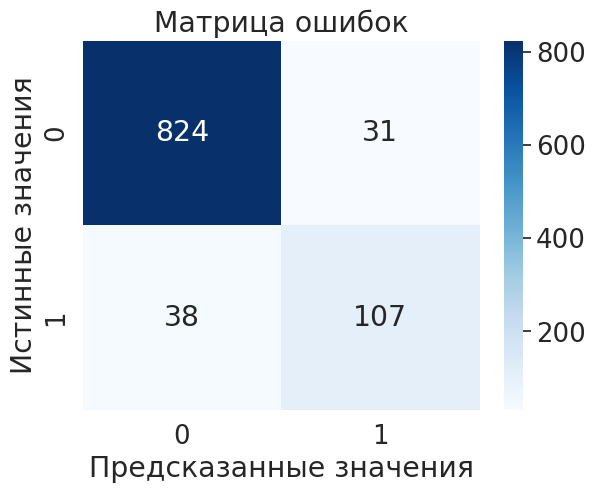

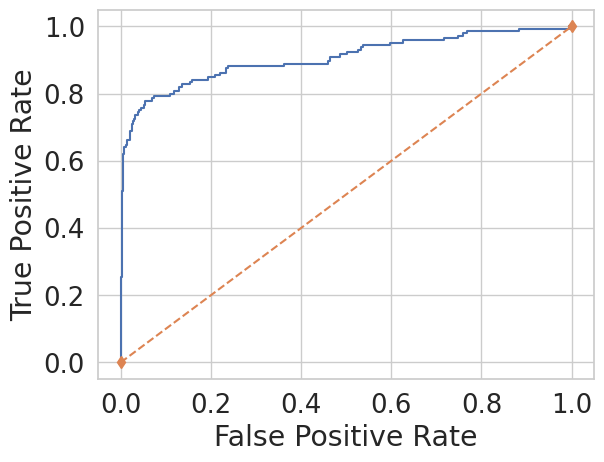

AUC: 0.906


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=70, random_state=42)

In [26]:
X_train_rfe=rfe.transform(X_train)
X_test_rfe=rfe.transform(X_test)
calculate_model(model=model4, X_train=X_train_rfe, X_test=X_test_rfe, y_train=y_train, y_test=y_test)

*Видим, что при таком количестве признаков качество модели практически не ухудшилось*

**В настоящей работе мы применили классификацию с помощью модели RandomForestClassifier "из коробки", попробовали улучшить метрики качества при помощи подбора гиперпараметров GridSearchCV - убедились, что в случае с RandomForestClassifier модель дает хорошие метрики даже с параметрами по умолчанию. С помощью кросс-валидации убедились в том, что модель не склонна к переобучению. С применением Recursive Feature Elimination нашли, что для модели достаточно оставить 9 из 17 признаков - качество модели от этого практически не ухудшается**.